# Problem Statement

❓ **How could Olist improve its profit** ❓

## Data that we analysed to calculate **global profits**



### * 10% revenues share

### * Seller subscription
   
### * Cost of bad reviews 
    
### * IT costs 

## Current Profits and Costs without changes

In [163]:
print(calc_prof(seller_df_2))

- IT Cost: 496991 
- Sum of Profits: 835518 

--> Global Profits: 338527


### P&L Rules

#### Revenues  
**Sales fees:** Olist takes a **10% cut** on the product price (excl. freight) of each order delivered  
**Subscription fees:** Olist charges **80 BRL by month** per seller

#### Costs
**Reputation costs** *estimated* per order with bad reviews (<= 3 stars)  

💡 In the long term, bad customer experience has business implications: low repeat rate, immediate customer support cost, refunds or unfavorable word of mouth communication. We will assume that we have an estimate measure of the monetary cost for each bad review:
```python
# review_score: cost(BRL)
{'1 star': 100
'2 stars': 50
'3 stars': 40
'4 stars': 0
'5 stars': 0}
```

**IT costs:** Olist's **total cumulated IT Costs** scale with the square root of the total number of sellers that has ever join the platform, as well as the square root of the total cumulated number of items that were ever sold.  

$IT\_costs = \alpha * \sqrt{n\_sellers} + \beta * \sqrt{n\_items}$  
Olist's data team gave us the following values for these scaling parameters:
- $\alpha = 3157.27$
- $\beta = 978.23$

💡 Both number of sellers to manage and sales transaction are costly for IT systems.  
💡 Yet square roots reflect scale-effects: IT-system are often more efficient as they grow bigger.  
💡 Alpha > Beta means that Olist has a lower IT Cost with few sellers selling a lot of items rather than the opposite  
- with **1000 sellers** and a total of **100 items** sold, the total IT cost accumulates to 109,624 BRL
- with **100 sellers** and a total of **1000 items** sold, the total IT cost accumulates to 62,507 BRL

Finally, The IT department also told you that since the birth of the marketplace, cumulated IT costs have amounted to **500,000 BRL**.

### Key Findings, so far

- `wait_time` is the most significant factor behind low review scores  
- `wait_time` is made up of seller's `delay_to_carrier` + `carrier_delivery_time`.  
- The latter being outside of Olist's direct control, improving it is not a quick-win recommendation
- On the contrary, a better selection of `sellers` can positively impact the `delay_to_carrier` and reduce the number of bad `review_scores` on Olist.
- Comments of the bad reviews showed that some were linked to the seller or to the product itself.

💡 We recommend you to start with the the guided seller analysis in part 2 below  
💪 But feel free to investigate into other hypothesis instead with part 3

## 2. Should Olist remove under-performing sellers from its marketplace? 🕵🏻
*(recommended)*

To analyze the impact of removing the worse sellers from Olist's marketplace, we will perform a **what-if analysis**

👉 **What would have happened if Olist had never accepted these sellers in the first place?**  

*(In practice, it's hard to know in advance who is a good seller, but let's start with this approach and iterate later).*

### 2.1 Data Preparation

Compute, for each `seller_id`, and cumulated since the beginning:
- the `revenues` it brings
- the `review_costs` associated with all its bad reviews
- the resulting `profits` (revenues - costs)

👉 Write down a step-by-step strategy to create the DataFrame you need


⚠️ Don't start from scratch, update your existing package 😉

Starting from the `Seller` class of your `olist` package:

Edit the `get_training_data` method so that the DataFrame it returns contains the fields:
- `revenues`: sum of subscription and sales fees revenues
- `cost_of_reviews`: sum of costs associated with bad reviews
- `profits`: `revenues` - `cost_of_reviews`

# Problem Statement 

## How to maximise global profits:

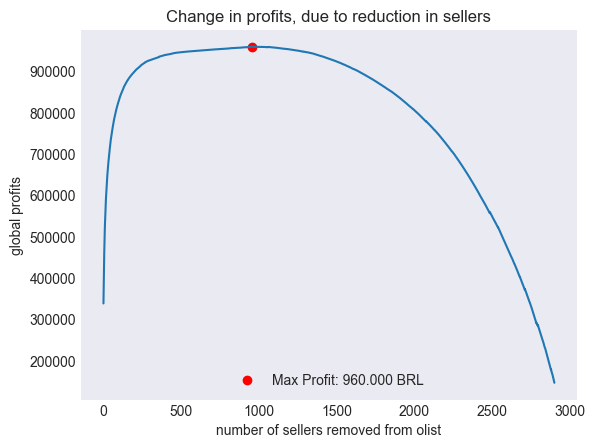

In [157]:
#plot our profits, red dot is the max profit for number of sellers 
import matplotlib.pyplot as plt
plt.plot(global_profits_list)
plt.scatter(x=954, y = 959257.3029502246, c="r", label="Max Profit: 960.000 BRL")
plt.xlabel("number of sellers removed from olist")
plt.ylabel("global profits")
plt.title("Change in profits, due to reduction in sellers")
plt.legend(loc="lower center")
plt.show();

This would remove, this many sellers:

In [105]:
global_profits_list.index(959257.3029502246)

954

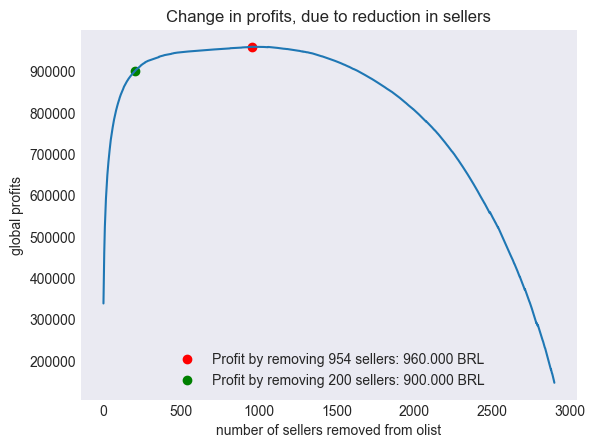

In [156]:
#plot our profits, red dot is the max profit for number of sellers 
plt.plot(global_profits_list)
plt.scatter(x=954, y = 959257.3029502246, c="r", label="Profit by removing 954 sellers: 960.000 BRL")
plt.xlabel("number of sellers removed from olist")
plt.ylabel("global profits")
plt.title("Change in profits, due to reduction in sellers")
plt.scatter(x=200, y = 899523.2050866921, c="g", label="Profit by removing 200 sellers: 900.000 BRL")
plt.legend(loc="lower center")
plt.show();

In [153]:
mean_profit_per_seller = seller_df["profits"].mean()
import seaborn as sns

In [175]:
g_ = global_profits_list
elimination_deriv = [g_[i+1]- g_[i] for i in range(len(g_)-1)]

from matplotlib.ticker import FuncFormatter
def format_secondary_axis(x, pos):
    return f'{round(x/2967*100,1)}%'
plt.style.use("seaborn-dark")


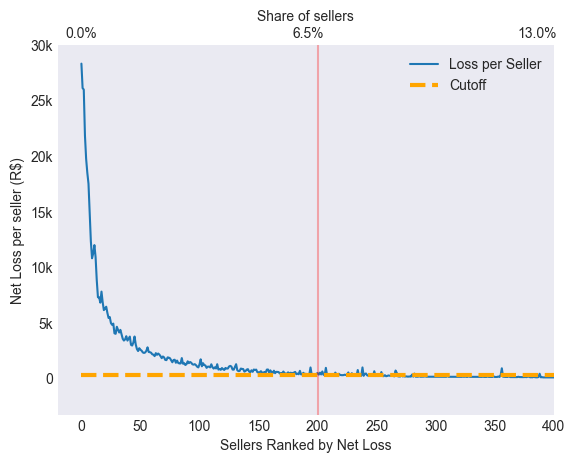

In [176]:
fig, ax1 = plt.subplots()
sns.lineplot(x=range(len(elimination_deriv)), y=elimination_deriv, label='Loss per Seller', ax=ax1)
ax1.plot([mean_profit_per_seller]*len(elimination_deriv), label='Cutoff', c='orange', linewidth=3,linestyle='dashed')
ax1.set_xlim(-20,400)
ax1.set_xlabel('Sellers Ranked by Net Loss')
ax1.set_ylabel('Net Loss per seller (R$)')
ax1.legend(loc='upper right')
ax1.set_yticks([0, 5000, 10000, 15000, 20000, 25000, 30000], labels=['0','5k', '10k', '15k', '20k', '25k', '30k'])
ax2 = ax1.secondary_xaxis('top')
ax2.set_xticks([0,192,386])
ax2.set_xlabel('Share of sellers')
plt.axvline(x=200, c="r", alpha=0.3)
ax2.xaxis.set_major_formatter(FuncFormatter(format_secondary_axis))


## Recommendations: 

### - remove worst performing sellers (200)
 
### - alert and support remaining underperformers (754)
 
####        - reduce shipping time of delivering products 
         
####        - decrease time to deliver to carrier 
         
####        - follow up on reviews and offer compensation (ex: voucher)
         
### - plan a follow-up in 6 months in case of no significant improvement in reviews

In [1]:
import math

In [24]:
from olist.seller import Seller 
seller_df = Seller().get_training_data()
seller_df

/Users/manonantonacci/code/manonantonacci/04-Decision-Science/01-Project-Setup/data-context-and-setup/olist/seller.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_cleared["dim_five_star"] = merged_df_cleared["review_score"].apply(lambda x: 1 if x == 5 else 0)
/Users/manonantonacci/code/manonantonacci/04-Decision-Science/01-Project-Setup/data-context-and-setup/olist/seller.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_cleared["dim_one_star"] = merged_df_cleared["review_score

,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,months_on_olist,n_orders,quantity,quantity_per_order,sales,review_score,share_of_five_star,share_of_one_star
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP,0.000000,13.018588,2017-05-05 16:25:11,2017-08-30 12:50:19,4.0,3,3,1.000000,218.70,3.000000,0.333333,0.333333
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,0.000000,9.065716,2017-03-29 02:10:34,2018-06-06 20:15:21,14.0,40,41,1.025000,11703.07,4.560976,0.731707,0.048780
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ,0.000000,4.042292,2018-07-30 12:44:49,2018-07-30 12:44:49,0.0,1,1,1.000000,158.00,5.000000,1.000000,0.000000
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo,SP,0.000000,5.667187,2018-08-03 00:44:08,2018-08-03 00:44:08,0.0,1,1,1.000000,79.99,5.000000,1.000000,0.000000
4,51a04a8a6bdcb23deccc82b0b80742cf,braganca paulista,SP,3.353727,35.314861,2017-11-14 12:15:25,2017-11-14 12:15:25,0.0,1,1,1.000000,167.99,1.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2962,98dddbc4601dd4443ca174359b237166,sarandi,PR,0.000000,8.230822,2018-07-14 03:10:19,2018-07-23 15:34:03,0.0,2,2,1.000000,158.00,5.000000,1.000000,0.000000
2963,f8201cab383e484733266d1906e2fdfa,palhoca,SC,0.000000,13.045797,2017-06-17 15:30:11,2018-08-11 19:55:17,14.0,10,10,1.000000,889.00,4.100000,0.500000,0.100000
2964,74871d19219c7d518d0090283e03c137,sao paulo,SP,0.000000,3.606625,2018-04-05 17:09:46,2018-08-21 19:25:15,5.0,6,7,1.166667,550.04,5.000000,1.000000,0.000000
2965,e603cf3fec55f8697c9059638d6c8eb5,pelotas,RS,0.000000,6.657634,2017-02-09 02:43:17,2017-06-16 17:30:16,4.0,8,11,1.375000,297.00,4.454545,0.636364,0.000000


In [25]:
#calculate revenues of sellers
seller_df.loc[: , "revenues"] = (0.1 * seller_df["sales"]) + (80 * seller_df["months_on_olist"])
seller_df.head(10)

,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,months_on_olist,n_orders,quantity,quantity_per_order,sales,review_score,share_of_five_star,share_of_one_star,revenues
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP,0.000000,13.018588,2017-05-05 16:25:11,2017-08-30 12:50:19,4.0,3,3,1.000000,218.70,3.000000,0.333333,0.333333,341.870
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,0.000000,9.065716,2017-03-29 02:10:34,2018-06-06 20:15:21,14.0,40,41,1.025000,11703.07,4.560976,0.731707,0.048780,2290.307
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ,0.000000,4.042292,2018-07-30 12:44:49,2018-07-30 12:44:49,0.0,1,1,1.000000,158.00,5.000000,1.000000,0.000000,15.800
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo,SP,0.000000,5.667187,2018-08-03 00:44:08,2018-08-03 00:44:08,0.0,1,1,1.000000,79.99,5.000000,1.000000,0.000000,7.999
4,51a04a8a6bdcb23deccc82b0b80742cf,braganca paulista,SP,3.353727,35.314861,2017-11-14 12:15:25,2017-11-14 12:15:25,0.0,1,1,1.000000,167.99,1.000000,0.000000,1.000000,16.799
5,c240c4061717ac1806ae6ee72be3533b,rio de janeiro,RJ,0.000000,6.056956,2018-05-08 17:55:23,2018-05-08 17:55:23,0.0,1,1,1.000000,59.90,4.000000,0.000000,0.000000,5.990
6,e49c26c3edfa46d227d5121a6b6e4d37,brejao,PE,0.000000,11.653801,2017-02-04 19:31:42,2018-07-25 14:30:27,18.0,35,36,1.028571,3654.25,4.416667,0.722222,0.055556,1805.425
7,1b938a7ec6ac5061a66a3766e0e75f90,penapolis,SP,0.000000,11.376438,2017-09-23 17:24:32,2018-08-18 19:09:29,11.0,30,33,1.100000,3987.60,4.242424,0.606061,0.121212,1278.760
8,768a86e36ad6aae3d03ee3c6433d61df,sao paulo,SP,0.000000,5.081859,2018-06-19 12:18:24,2018-08-24 03:15:18,2.0,17,17,1.000000,587.46,4.647059,0.705882,0.000000,218.746
9,ccc4bbb5f32a6ab2b7066a4130f114e3,curitiba,PR,0.000000,15.853247,2017-01-07 14:00:13,2018-08-21 21:05:16,19.0,187,192,1.026738,74004.62,4.282723,0.649215,0.083770,8920.462


In [26]:
from olist.data import Olist
data = Olist().get_data()
data.keys()


dict_keys(['customers', 'orders', 'geolocation', 'products', 'order_items', 'sellers', 'order_payments', 'product_category_name_translation', 'order_reviews'])

In [27]:
#calculcate review costs per order
review_df = data["order_reviews"]
review_df.loc[:, "review_cost"] = review_df["review_score"].apply(lambda x: 100 if x == 1 else 50 if x==2 else 40 if x == 3 else 0)
review_df.sample(10)

#load all dataframes and merge to get seller_id and review_costs in one df
orders = data["orders"].drop_duplicates()
order_items = data["order_items"].drop_duplicates()
sellers = data["sellers"].drop_duplicates()
orders_Merged = orders.merge(review_df, on = "order_id").merge(order_items, on = "order_id").merge(sellers, on = "seller_id")

#drop unnecessary columns
orders_Merged_clean = orders_Merged[["seller_id", "review_cost"]]

#group by seller_id
orders_Merged_clean = orders_Merged_clean.groupby("seller_id").sum().reset_index()
orders_Merged_clean.drop_duplicates()
                                    

,seller_id,review_cost
0,0015a82c2db000af6aaaf3ae2ecb0532,100
1,001cca7ae9ae17fb1caed9dfb1094831,4750
2,001e6ad469a905060d959994f1b41e4f,100
3,002100f778ceb8431b7a1020ff7ab48f,1110
4,003554e2dce176b5555353e4f3555ac8,0
...,...,...
3085,ffcfefa19b08742c5d315f2791395ee5,100
3086,ffdd9f82b9a447f6f8d4b91554cc7dd3,240
3087,ffeee66ac5d5a62fe688b9d26f83f534,200
3088,fffd5413c0700ac820c7069d66d98c89,1360


In [28]:
#add review_costs to our seller_df by merging the two dfs
seller_df = seller_df.merge(orders_Merged_clean, on ="seller_id")
seller_df

,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,months_on_olist,n_orders,quantity,quantity_per_order,sales,review_score,share_of_five_star,share_of_one_star,revenues,review_cost
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP,0.000000,13.018588,2017-05-05 16:25:11,2017-08-30 12:50:19,4.0,3,3,1.000000,218.70,3.000000,0.333333,0.333333,341.870,140
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,0.000000,9.065716,2017-03-29 02:10:34,2018-06-06 20:15:21,14.0,40,41,1.025000,11703.07,4.560976,0.731707,0.048780,2290.307,240
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ,0.000000,4.042292,2018-07-30 12:44:49,2018-07-30 12:44:49,0.0,1,1,1.000000,158.00,5.000000,1.000000,0.000000,15.800,0
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo,SP,0.000000,5.667187,2018-08-03 00:44:08,2018-08-03 00:44:08,0.0,1,1,1.000000,79.99,5.000000,1.000000,0.000000,7.999,0
4,51a04a8a6bdcb23deccc82b0b80742cf,braganca paulista,SP,3.353727,35.314861,2017-11-14 12:15:25,2017-11-14 12:15:25,0.0,1,1,1.000000,167.99,1.000000,0.000000,1.000000,16.799,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2962,98dddbc4601dd4443ca174359b237166,sarandi,PR,0.000000,8.230822,2018-07-14 03:10:19,2018-07-23 15:34:03,0.0,2,2,1.000000,158.00,5.000000,1.000000,0.000000,15.800,0
2963,f8201cab383e484733266d1906e2fdfa,palhoca,SC,0.000000,13.045797,2017-06-17 15:30:11,2018-08-11 19:55:17,14.0,10,10,1.000000,889.00,4.100000,0.500000,0.100000,1208.900,140
2964,74871d19219c7d518d0090283e03c137,sao paulo,SP,0.000000,3.606625,2018-04-05 17:09:46,2018-08-21 19:25:15,5.0,6,7,1.166667,550.04,5.000000,1.000000,0.000000,455.004,0
2965,e603cf3fec55f8697c9059638d6c8eb5,pelotas,RS,0.000000,6.657634,2017-02-09 02:43:17,2017-06-16 17:30:16,4.0,8,11,1.375000,297.00,4.454545,0.636364,0.000000,349.700,50


In [29]:
#calculate profits per seller for olist 
seller_df.loc[: , "profits"] = seller_df["revenues"] - seller_df["review_cost"]
seller_df

,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,months_on_olist,n_orders,quantity,quantity_per_order,sales,review_score,share_of_five_star,share_of_one_star,revenues,review_cost,profits
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP,0.000000,13.018588,2017-05-05 16:25:11,2017-08-30 12:50:19,4.0,3,3,1.000000,218.70,3.000000,0.333333,0.333333,341.870,140,201.870
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,0.000000,9.065716,2017-03-29 02:10:34,2018-06-06 20:15:21,14.0,40,41,1.025000,11703.07,4.560976,0.731707,0.048780,2290.307,240,2050.307
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ,0.000000,4.042292,2018-07-30 12:44:49,2018-07-30 12:44:49,0.0,1,1,1.000000,158.00,5.000000,1.000000,0.000000,15.800,0,15.800
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo,SP,0.000000,5.667187,2018-08-03 00:44:08,2018-08-03 00:44:08,0.0,1,1,1.000000,79.99,5.000000,1.000000,0.000000,7.999,0,7.999
4,51a04a8a6bdcb23deccc82b0b80742cf,braganca paulista,SP,3.353727,35.314861,2017-11-14 12:15:25,2017-11-14 12:15:25,0.0,1,1,1.000000,167.99,1.000000,0.000000,1.000000,16.799,100,-83.201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2962,98dddbc4601dd4443ca174359b237166,sarandi,PR,0.000000,8.230822,2018-07-14 03:10:19,2018-07-23 15:34:03,0.0,2,2,1.000000,158.00,5.000000,1.000000,0.000000,15.800,0,15.800
2963,f8201cab383e484733266d1906e2fdfa,palhoca,SC,0.000000,13.045797,2017-06-17 15:30:11,2018-08-11 19:55:17,14.0,10,10,1.000000,889.00,4.100000,0.500000,0.100000,1208.900,140,1068.900
2964,74871d19219c7d518d0090283e03c137,sao paulo,SP,0.000000,3.606625,2018-04-05 17:09:46,2018-08-21 19:25:15,5.0,6,7,1.166667,550.04,5.000000,1.000000,0.000000,455.004,0,455.004
2965,e603cf3fec55f8697c9059638d6c8eb5,pelotas,RS,0.000000,6.657634,2017-02-09 02:43:17,2017-06-16 17:30:16,4.0,8,11,1.375000,297.00,4.454545,0.636364,0.000000,349.700,50,299.700


In [30]:
seller_df_new = seller_df.copy()

In [8]:
n_sellers = seller_df.shape[0]
n_items = sum(seller_df["quantity"])
n_items


112441

In [9]:
current_IT_cost = 3157.27 * math.sqrt(n_sellers) + 978.23 * math.sqrt(n_items)
current_IT_cost

499999.31851932954

In [10]:
total_profits = sum(seller_df["profits"])
total_profits

809168.4439999997

### Calculate current IT costs, Profits and Global Profits

In [162]:
def calc_prof(df):
    n_sellers = df.shape[0]
    n_items = sum(df["quantity"])
    IT_cost = 3157.27 * math.sqrt(n_sellers) + 978.23 * math.sqrt(n_items)
    total_profits = sum(df["profits"])
    global_profits = total_profits - IT_cost
    return (f"- IT Cost: {round(IT_cost)} \n- Sum of Profits: {round(total_profits)} \n\n--> Global Profits: {round(global_profits)}")

print(calc_prof(seller_df))    

- IT Cost: 499999 
- Sum of Profits: 809168 

--> Global Profits: 309169


### Calculate what would change if we remove the "worst" seller

In [12]:
#try out: sort by profits
seller_df_2 = seller_df.sort_values("profits")

#check our new df sorted by profits
seller_df_2

,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,months_on_olist,n_orders,quantity,quantity_per_order,sales,review_score,share_of_five_star,share_of_one_star,revenues,review_cost,profits
769,6560211a19b47992c3666cc44a7e94c0,sao paulo,SP,0.0,9.539486,2017-02-17 07:45:11,2018-08-29 09:25:12,18.0,1854,2033,1.096548,123304.83,3.909406,0.506931,0.132178,13770.483,40120,-26349.517
453,1f50f920176fa81dab994f9023523100,sao jose do rio preto,SP,0.0,15.571831,2017-04-03 22:15:14,2018-08-28 03:45:18,17.0,1404,1931,1.375356,106939.21,3.982402,0.567288,0.145963,12053.921,37490,-25436.079
1132,7c67e1448b00f6e969d365cea6b010ab,itaquaquecetuba,SP,0.0,22.392546,2017-01-26 22:55:10,2018-08-08 03:10:34,18.0,982,1364,1.389002,187923.89,3.348208,0.319678,0.236284,20232.389,44290,-24057.611
2358,4a3ca9315b744ce9f8e9374361493884,ibitinga,SP,0.0,14.416471,2017-01-08 09:45:12,2018-08-27 11:04:18,20.0,1806,1987,1.100221,200472.92,3.803931,0.477319,0.148185,21647.292,44620,-22972.708
1357,cc419e0650a3c5ba77189a1882b7556a,santo andre,SP,0.0,11.539753,2017-02-02 17:10:21,2018-08-28 03:45:15,19.0,1706,1775,1.040445,104288.42,4.069575,0.581447,0.118719,11948.842,31070,-19121.158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,ccc4bbb5f32a6ab2b7066a4130f114e3,curitiba,PR,0.0,15.853247,2017-01-07 14:00:13,2018-08-21 21:05:16,19.0,187,192,1.026738,74004.62,4.282723,0.649215,0.083770,8920.462,2300,6620.462
2151,edb1ef5e36e0c8cd84eb3c9b003e486d,teresopolis,RJ,0.0,11.709806,2017-09-30 09:49:22,2018-08-20 19:30:10,11.0,166,175,1.054217,79284.55,4.434286,0.702857,0.062857,8808.455,1570,7238.455
67,7e93a43ef30c4f03f38b393420bc753a,barueri,SP,0.0,11.335141,2016-10-08 03:19:09,2018-07-14 21:25:19,21.0,336,340,1.011905,176431.87,4.206490,0.628319,0.103245,19323.187,4840,14483.187
534,fa1c13f2614d7b5c4749cbc52fecda94,sumare,SP,0.0,13.341871,2017-01-07 20:55:10,2018-08-29 10:04:16,20.0,585,586,1.001709,194042.03,4.340206,0.676976,0.085911,21004.203,6510,14494.203


In [13]:
#drop the first row, with the biggest negativ profit
seller_df_2.drop([769], axis = 0, inplace = True)

#call our function on the df to get the IT costs, sum of profits and global profits for olist 
calc_prof(seller_df_2)

'IT Cost: 496991; Sum of Profits: 835518; Global Profits: 338527'

## Let's automate the step of dropping bad performing sellers 

In [14]:
#store our global profits in a list

global_profits_list = []
def calc_prof_2(df):
    n_sellers = df.shape[0]
    n_items = sum(df["quantity"])
    IT_cost = 3157.27 * math.sqrt(n_sellers) + 978.23 * math.sqrt(n_items)
    total_profits = sum(df["profits"])
    global_profits = total_profits - IT_cost
    global_profits_list.append(global_profits)

#sort df by profits and reindex, so the first row has index 0
seller_df = seller_df.sort_values("profits").reset_index(drop=True)

for element in range(2900): 
    #drop first row
    seller_df.drop([0], axis = 0, inplace = True)
    #calculate the global profit for olist, with one seller less
    calc_prof_2(seller_df)
    #reset the index, so the first row has index 0 again 
    seller_df = seller_df.reset_index(drop=True)
    

#get the biggest number in our global profits list
max(global_profits_list)



959257.3029502246

In [15]:
#getting the index for our biggest profit -> this is the number of sellers we are dropping 

global_profits_list.index(959257.3029502246)

954

In [101]:
global_profits_list[150]

875264.7423313463

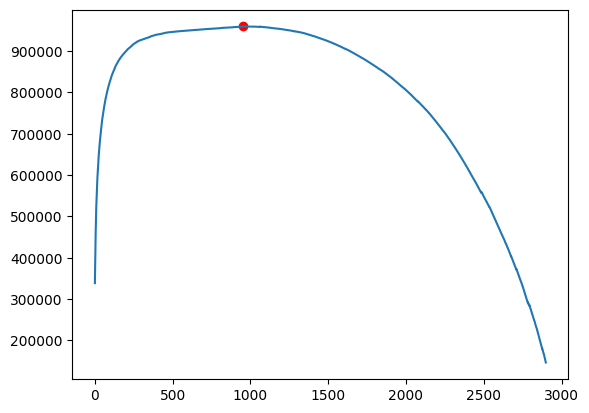

In [102]:
#plot our profits, red dot is the max profit for number of sellers 
import matplotlib.pyplot as plt
plt.plot(global_profits_list)
plt.scatter(x=954, y = 959257.3029502246, c="r")
#plt.scatter(x=200, y = 899523.2050866921, c="r")
plt.show();

### 2.2 What-if Analysis

👉 Time to perform the actual analysis, here are our steps:  

1️⃣ Create a method that will help us update the IT Costs after removing sellers along with the items they sold

2️⃣ Sort sellers by increasing profits

3️⃣ Remove sellers one by one, starting from the one with the lowest profit.
- For each number of sellers to remove, compute the financial impact on Olist global profits.

4️⃣ Find an optimal number of sellers to remove that maximizes either Olist's profit margin or profit.

## 3. Investigate other Approaches 🕵️
*(optional)*

- Should Olist remove the worst performing products / categories from its marketplace entirely?
- Should Olist remove only consistently underperforming sellers, after it has a honeymoon period of few months?
- Should Olist enforce sellers to include certain information on their product listings?
- Should Olist ask customers for purchase confirmation at certain times of day?
- Should Olist restrict seller/customer pairs between certain states to avoid delays?
- Should Olist acquire new sellers, with some cost assumptions to be suggested?
- ...


## Your turn!

🧺 Keep this notebook tidy! 

🗣 📊 You will present your insights to your favorite TA at the end of this `Communicate` unit 💪

## Product Category investigation

In [47]:
data.keys()

dict_keys(['customers', 'orders', 'geolocation', 'products', 'order_items', 'sellers', 'order_payments', 'product_category_name_translation', 'order_reviews'])

In [17]:
products = data["products"]
products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [20]:
#Check for how many product categories we have 
products["product_category_name"].nunique()

73

In [50]:
#load all relevant dataframes and merge
reviews_2 = data["order_reviews"]
orders_2 = data["orders"]
order_items_2 = data["order_items"]

product_cat = orders_2.merge(reviews_2, on="order_id", how="inner").merge(order_items_2, on="order_id", how="inner").merge(products, on="product_id", how="inner")
product_cat

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,b46f1e34512b0f4c74a72398b03ca788,4,...,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,dc90f19c2806f1abba9e72ad3c350073,5,...,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,1bafb430e498b939f258b9c9dbdff9b1,3,...,29.99,14.10,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,4,...,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112367,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-10 21:35:26,2017-08-18 16:42:51,2017-08-23 15:36:29,2017-08-31 00:00:00,f5453b3d33358ed459eb4312392b96a8,4,...,356.00,18.12,esporte_lazer,53.0,1105.0,1.0,2800.0,28.0,23.0,23.0
112368,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-10 21:35:26,2017-08-18 16:42:51,2017-08-23 15:36:29,2017-08-31 00:00:00,f5453b3d33358ed459eb4312392b96a8,4,...,356.00,18.12,esporte_lazer,53.0,1105.0,1.0,2800.0,28.0,23.0,23.0
112369,cfa78b997e329a5295b4ee6972c02979,a2f7428f0cafbc8e59f20e1444b67315,delivered,2017-12-20 09:52:41,2017-12-20 10:09:52,2017-12-20 20:25:25,2018-01-26 15:45:14,2018-01-18 00:00:00,8ea780895f362ce949029f95b7181ff0,1,...,55.90,15.14,instrumentos_musicais,34.0,372.0,2.0,300.0,16.0,6.0,12.0
112370,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,e262b3f92d1ce917aa412a9406cf61a6,5,...,72.00,13.08,beleza_saude,50.0,1517.0,1.0,1175.0,22.0,13.0,18.0


In [65]:
#calculate revenues per order
product_cat.loc[: , "revenues_per_order"] = 0.1 * product_cat["price"]

#review cost per order
product_cat.loc[:, "review_cost"] = product_cat["review_score"].map({1: 100, 2: 50, 3: 40, 4: 0, 5: 0})



In [69]:
product_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112372 entries, 0 to 112371
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112372 non-null  object 
 1   customer_id                    112372 non-null  object 
 2   order_status                   112372 non-null  object 
 3   order_purchase_timestamp       112372 non-null  object 
 4   order_approved_at              112357 non-null  object 
 5   order_delivered_carrier_date   111188 non-null  object 
 6   order_delivered_customer_date  110012 non-null  object 
 7   order_estimated_delivery_date  112372 non-null  object 
 8   review_id                      112372 non-null  object 
 9   review_score                   112372 non-null  int64  
 10  review_comment_title           13434 non-null   object 
 11  review_comment_message         47642 non-null   object 
 12  review_creation_date          

In [71]:
product_cat = product_cat[["order_id", "review_score", "review_cost", "product_category_name", "seller_id", "revenues_per_order"]]
                    
                          
                          

,order_id,review_score,review_cost,product_category_name,seller_id,revenues_per_order
0,e481f51cbdc54678b7cc49136f2d6af7,4,0,utilidades_domesticas,3504c0cb71d7fa48d967e0e4c94d59d9,2.999
1,128e10d95713541c87cd1a2e48201934,4,0,utilidades_domesticas,3504c0cb71d7fa48d967e0e4c94d59d9,2.999
2,0e7e841ddf8f8f2de2bad69267ecfbcf,5,0,utilidades_domesticas,3504c0cb71d7fa48d967e0e4c94d59d9,2.999
3,bfc39df4f36c3693ff3b63fcbea9e90a,3,40,utilidades_domesticas,3504c0cb71d7fa48d967e0e4c94d59d9,2.999
4,53cdb2fc8bc7dce0b6741e2150273451,4,0,perfumaria,289cdb325fb7e7f891c38608bf9e0962,11.870
...,...,...,...,...,...,...
112367,e8fd20068b9f7e6ec07068bb7537f781,4,0,esporte_lazer,218d46b86c1881d022bce9c68a7d4b15,35.600
112368,e8fd20068b9f7e6ec07068bb7537f781,4,0,esporte_lazer,218d46b86c1881d022bce9c68a7d4b15,35.600
112369,cfa78b997e329a5295b4ee6972c02979,1,100,instrumentos_musicais,ce248b21cb2adc36282ede306b7660e5,5.590
112370,9c5dedf39a927c1b2549525ed64a053c,5,0,beleza_saude,e24fc9fcd865784fb25705606fe3dfe7,7.200


In [72]:
product_cat.loc[: , "profit_per_order"]  = product_cat["revenues_per_order"] - product_cat["review_cost"]
product_cat

,order_id,review_score,review_cost,product_category_name,seller_id,revenues_per_order,profit_per_order
0,e481f51cbdc54678b7cc49136f2d6af7,4,0,utilidades_domesticas,3504c0cb71d7fa48d967e0e4c94d59d9,2.999,2.999
1,128e10d95713541c87cd1a2e48201934,4,0,utilidades_domesticas,3504c0cb71d7fa48d967e0e4c94d59d9,2.999,2.999
2,0e7e841ddf8f8f2de2bad69267ecfbcf,5,0,utilidades_domesticas,3504c0cb71d7fa48d967e0e4c94d59d9,2.999,2.999
3,bfc39df4f36c3693ff3b63fcbea9e90a,3,40,utilidades_domesticas,3504c0cb71d7fa48d967e0e4c94d59d9,2.999,-37.001
4,53cdb2fc8bc7dce0b6741e2150273451,4,0,perfumaria,289cdb325fb7e7f891c38608bf9e0962,11.870,11.870
...,...,...,...,...,...,...,...
112367,e8fd20068b9f7e6ec07068bb7537f781,4,0,esporte_lazer,218d46b86c1881d022bce9c68a7d4b15,35.600,35.600
112368,e8fd20068b9f7e6ec07068bb7537f781,4,0,esporte_lazer,218d46b86c1881d022bce9c68a7d4b15,35.600,35.600
112369,cfa78b997e329a5295b4ee6972c02979,1,100,instrumentos_musicais,ce248b21cb2adc36282ede306b7660e5,5.590,-94.410
112370,9c5dedf39a927c1b2549525ed64a053c,5,0,beleza_saude,e24fc9fcd865784fb25705606fe3dfe7,7.200,7.200


In [158]:
prod_cat_2 = product_cat.groupby("product_category_name").agg({"profit_per_order": ["sum","mean"], "order_id": "count"}).sort_values(("profit_per_order", "sum"))
prod_cat_2.head(20)

profit_per_order            order_id
                                         sum       mean    count
product_category_name                                           
cama_mesa_banho                  -126645.969 -11.371641    11137
moveis_decoracao                 -101223.558 -12.150229     8331
informatica_acessorios            -66172.061  -8.430636     7849
utilidades_domesticas             -56904.178  -8.195906     6943
telefonia                         -53438.893 -11.830616     4517
esporte_lazer                     -41315.108  -4.781841     8640
eletronicos                       -30811.693 -11.208328     2749
ferramentas_jardim                -28095.311  -6.490023     4329
beleza_saude                      -25179.515  -2.610629     9645
moveis_escritorio                 -22116.018 -13.109673     1687
bebes                             -15278.325  -5.012574     3048
fashion_bolsas_e_acessorios       -14846.358  -7.281196     2039
brinquedos                        -14679.790  -3.588313     4091
perfumaria                        -13652.193  -3.990702     3421
papelaria                         -11966.422  -4.773204     2507
automotivo                        -11213.010  -2.661526     4213
pet_shop                           -6517.708  -3.361376     1939
consoles_games                     -4609.373  -4.089949     1127
casa_conforto                      -4434.816 -10.194979      435
bebidas                            -4148.404 -11.003724      377

In [56]:
product_cat.groupby("product_category_name").agg({"review_score": "mean"}).sort_values("review_score")

,review_score
product_category_name,
seguros_e_servicos,2.500000
fraldas_higiene,3.256410
portateis_cozinha_e_preparadores_de_alimentos,3.266667
pc_gamer,3.333333
moveis_escritorio,3.493183
...,...
flores,4.419355
construcao_ferramentas_ferramentas,4.444444
livros_interesse_geral,4.446266


### product category investigation advanced 

In [61]:
prod_sell_cat = product_cat.groupby(["seller_id", "product_category_name"]).agg({"review_score": "mean"}).sort_values(["seller_id", "review_score"], ascending=False)
prod_sell_cat.head(50)

review_score
seller_id                        product_category_name                          
ffff564a4f9085cd26170f4732393726 eletronicos                            5.000000
                                 market_place                           5.000000
                                 automotivo                             2.000000
                                 alimentos                              1.000000
                                 construcao_ferramentas_construcao      1.000000
                                 utilidades_domesticas                  1.000000
fffd5413c0700ac820c7069d66d98c89 utilidades_domesticas                  3.916667
                                 moveis_decoracao                       3.909091
                                 moveis_sala                            1.000000
ffeee66ac5d5a62fe688b9d26f83f534 eletrodomesticos                       4.214286
ffdd9f82b9a447f6f8d4b91554cc7dd3 moveis_decoracao                       4.666667
                                 utilidades_domesticas                  4.176471
ffcfefa19b08742c5d315f2791395ee5 livros_interesse_geral                 1.000000
ffc470761de7d0232558ba5e786e57b7 automotivo                             5.000000
                                 esporte_lazer                          5.000000
                                 ferramentas_jardim                     5.000000
                                 moveis_decoracao                       5.000000
                                 relogios_presentes                     4.600000
                                 construcao_ferramentas_construcao      4.400000
                                 utilidades_domesticas                  3.800000
                                 sinalizacao_e_seguranca                3.000000
ffad1e7127fb622cb64a900751590acd bebes                                  5.000000
                                 moveis_decoracao                       4.777778
ffa6adafb71b807dc13159e26431354c automotivo                             4.333333
                                 cool_stuff                             4.200000
                                 ferramentas_jardim                     4.000000
                                 esporte_lazer                          3.333333
                                 cine_foto                              3.200000
ff82e8873fba613f2261a9acc896fd84 cool_stuff                             5.000000
                                 bebes                                  3.000000
ff69aa92bb6b1bf9b8b7a51c2ed9cf8b cool_stuff                             4.000000
                                 bebes                                  3.631579
ff4ea69c2a729e83e63c7579e4ef8170 eletroportateis                        4.500000
ff4e2d38692ce827b1a4f4b8196e680d livros_interesse_geral                 4.750000
                                 livros_tecnicos                        4.000000
ff1fb4c404b2efe68b03350a8dc24122 esporte_lazer                          5.000000
                                 beleza_saude                           4.750000
                                 brinquedos                             4.125000
                                 eletronicos                            4.000000
                                 bebes                                  3.571429
                                 cool_stuff                             3.500000
ff1e15b778c700abdd4d239b81ac466d instrumentos_musicais                  5.000000
                                 esporte_lazer                          4.500000
ff063b022a9a0aab91bad2c9088760b7 industria_comercio_e_negocios          4.500000
                                 ferramentas_jardim                     4.386364
                                 moveis_decoracao                       4.183673
fedf2c1386e137f296b3bbf3b635e69d construcao_ferramentas_iluminacao      5.000000
                                 casa_construcao                        2.000000
fedaedd3ca31d56ab3

## Seller State investigation

In [35]:
seller_df_state = seller_df_new.copy()
seller_df_state

,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,months_on_olist,n_orders,quantity,quantity_per_order,sales,review_score,share_of_five_star,share_of_one_star,revenues,review_cost,profits
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP,0.000000,13.018588,2017-05-05 16:25:11,2017-08-30 12:50:19,4.0,3,3,1.000000,218.70,3.000000,0.333333,0.333333,341.870,140,201.870
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,0.000000,9.065716,2017-03-29 02:10:34,2018-06-06 20:15:21,14.0,40,41,1.025000,11703.07,4.560976,0.731707,0.048780,2290.307,240,2050.307
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ,0.000000,4.042292,2018-07-30 12:44:49,2018-07-30 12:44:49,0.0,1,1,1.000000,158.00,5.000000,1.000000,0.000000,15.800,0,15.800
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo,SP,0.000000,5.667187,2018-08-03 00:44:08,2018-08-03 00:44:08,0.0,1,1,1.000000,79.99,5.000000,1.000000,0.000000,7.999,0,7.999
4,51a04a8a6bdcb23deccc82b0b80742cf,braganca paulista,SP,3.353727,35.314861,2017-11-14 12:15:25,2017-11-14 12:15:25,0.0,1,1,1.000000,167.99,1.000000,0.000000,1.000000,16.799,100,-83.201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2962,98dddbc4601dd4443ca174359b237166,sarandi,PR,0.000000,8.230822,2018-07-14 03:10:19,2018-07-23 15:34:03,0.0,2,2,1.000000,158.00,5.000000,1.000000,0.000000,15.800,0,15.800
2963,f8201cab383e484733266d1906e2fdfa,palhoca,SC,0.000000,13.045797,2017-06-17 15:30:11,2018-08-11 19:55:17,14.0,10,10,1.000000,889.00,4.100000,0.500000,0.100000,1208.900,140,1068.900
2964,74871d19219c7d518d0090283e03c137,sao paulo,SP,0.000000,3.606625,2018-04-05 17:09:46,2018-08-21 19:25:15,5.0,6,7,1.166667,550.04,5.000000,1.000000,0.000000,455.004,0,455.004
2965,e603cf3fec55f8697c9059638d6c8eb5,pelotas,RS,0.000000,6.657634,2017-02-09 02:43:17,2017-06-16 17:30:16,4.0,8,11,1.375000,297.00,4.454545,0.636364,0.000000,349.700,50,299.700


In [36]:
seller_df_state["seller_state"].nunique()

22

In [37]:
seller_df_state["seller_state"].unique()

array(['SP', 'RJ', 'PE', 'PR', 'GO', 'SC', 'BA', 'DF', 'RS', 'MG', 'RN',
       'MT', 'CE', 'PB', 'ES', 'RO', 'PI', 'MS', 'SE', 'MA', 'AM', 'PA'],
      dtype=object)

In [39]:
#group by seller state
seller_df_state.groupby("seller_state").agg({"review_score": "mean", "seller_id": "count"})


,review_score,seller_id
seller_state,,
AM,2.333333,1
BA,4.105780,18
CE,3.678526,12
DF,4.024305,30
ES,4.380537,22
GO,4.112607,39
MA,4.002506,1
MG,4.111919,236
MS,4.288333,5


In [40]:
#we see that AM (Amazons) has very bad reviews, but only one seller -> let's investigate this seller

In [43]:
seller_df.sort_values("seller_state")

,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,months_on_olist,n_orders,quantity,quantity_per_order,sales,review_score,share_of_five_star,share_of_one_star,revenues,review_cost,profits
2268,327b89b872c14d1c0be7235ef4871685,manaus,AM,0.000000,47.840802,2017-02-03 01:15:11,2017-03-15 14:28:24,1.0,3,3,1.000000,1177.00,2.333333,0.333333,0.666667,197.700,200,-2.300
1040,398cb257329ef7af7f1943a8974a3cbc,salvador,BA,0.000000,7.091377,2018-07-20 15:05:22,2018-07-20 15:05:22,0.0,1,1,1.000000,145.90,5.000000,1.000000,0.000000,14.590,0,14.590
1130,2b402d5dc42554061f8ea98d1916f148,irece,BA,0.000000,6.000301,2018-04-28 16:30:42,2018-04-28 16:30:42,0.0,1,1,1.000000,299.89,5.000000,1.000000,0.000000,29.989,0,29.989
387,4221a7df464f1fe2955934e30ff3a5a1,bahia,BA,0.000000,16.569190,2018-06-27 20:52:04,2018-08-13 13:04:18,2.0,5,5,1.000000,849.50,4.800000,0.800000,0.000000,244.950,0,244.950
18,d2e753bb80b7d4faa77483ed00edc8ca,porto seguro,BA,0.000000,12.741620,2017-10-06 16:14:29,2018-05-18 04:14:33,7.0,14,15,1.071429,1320.70,3.625000,0.187500,0.062500,692.070,310,382.070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243,7813ea3ebd9411dc600b4dd01f7a97b9,osasco,SP,0.000000,13.033185,2017-08-04 15:30:10,2018-06-07 13:17:57,10.0,9,9,1.000000,1599.40,3.888889,0.666667,0.222222,959.940,240,719.940
1246,777a0c55737f34ffeb78010f7542ab41,sao paulo,SP,0.000000,4.233893,2018-06-27 11:05:27,2018-08-20 18:15:08,2.0,6,6,1.000000,452.50,4.333333,0.666667,0.000000,205.250,50,155.250
1248,c3867b4666c7d76867627c2f7fb22e21,guara,SP,0.000000,15.219364,2017-03-30 13:42:17,2018-07-09 00:25:18,15.0,245,259,1.057143,37153.40,3.853282,0.552124,0.169884,4915.340,5940,-1024.660
1236,37dd29b36c458d82f74a953c40c43645,limeira,SP,0.407797,18.833772,2017-10-08 17:07:15,2018-05-28 13:54:47,8.0,7,8,1.142857,4536.99,4.000000,0.500000,0.000000,1093.699,100,993.699


The Company from Manaus only had 3 orders, with not a lot of value. It delivered it's packages to the carrier on time, but it still took a lot of time to be delivered to the customer. Very little room for improvement though. 